In [5]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [6]:
def get_csv_hist(path):
    df = pd.read_csv(path, sep=';')
    return df.to_dict(orient='list')

In [7]:
# get_csv_hist('./all_logs/k_lstm.n64.d0.3.dep1.bs8.ts1.0.partition=customLOS_ALL_TIMESTEPS_WEIGHTED_RECIP.csv')

In [32]:
import os
dirpath = '../mimic3models/length_of_stay/keras_logs'
histpaths = [x for x in os.listdir(dirpath) if 'dsup' in x]
namestart = len('k_lstm.n256.d0.3.dep1.bs8.ts1.0PHE_')
names = [histpath[namestart+17:-5] for histpath in histpaths]
histpaths = [os.path.join(dirpath,histpath) for histpath in histpaths]

In [33]:
def get_csv_hist(path):
    df = pd.read_csv(path, sep=';')
    return df.to_dict(orient='list')

In [34]:
histories = [] 
for i,path in enumerate(histpaths):
    try:
        if 'pk' in path:
            with open(path, 'rb') as pkfile:
                hst = pickle.load(pkfile)
                hst['name'] = names[i]
                histories.append(hst)
        if 'csv' in path:
            hst = get_csv_hist(path)
            hst['name'] = names[i]
            histories.append(hst)
    except:
        pass

In [35]:
# from matplotlib import gridspec

# fig2 = plt.figure(constrained_layout=True)
# spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
# f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])
# f2_ax3 = fig2.add_subplot(spec2[1, 0])
# f2_ax4 = fig2.add_subplot(spec2[1, 1])

In [36]:
import seaborn as sns
linestyles = ['solid', 'dashed', 'dashdot', 'dotted']
def plot_multiple(metrics, histories):
    pal = sns.color_palette("colorblind", len(histories))

    for i,history in enumerate(histories):
        epochs = history['epoch']
        for j,metric in enumerate(metrics):
            values = history[metric]
            val_values = history[metric]
#             plt.plot(epochs, values, 'bo', label=history['name']+' Training '+metric, color = pal[i])
            plt.plot(epochs, val_values, 'b', label=history['name']+' '+metric, color = pal[i], linestyle = linestyles[j])

    
    plt.title('LOS Training and validation metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.savefig('los_'+metrics[0]+'.pdf')

    plt.show()

In [37]:
histories[0].keys()

dict_keys(['epoch', 'loss', 'train_kappa', 'train_mad', 'train_mape', 'train_mse', 'val_kappa', 'val_loss', 'val_mad', 'val_mape', 'val_mse', 'name'])

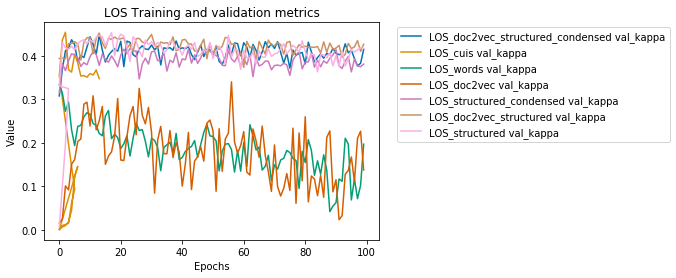

In [38]:
plot_multiple(['val_kappa'],histories)

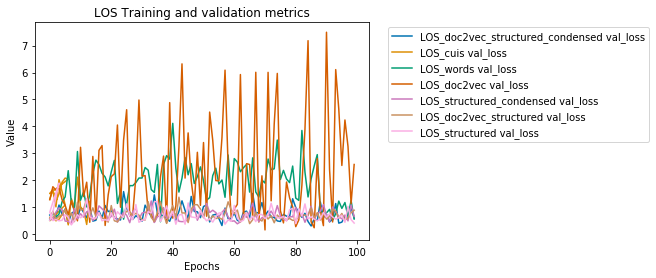

In [44]:
plot_multiple(['val_loss'],histories)

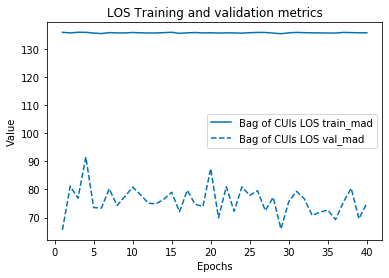

In [8]:
plot_multiple(['train_mad','val_mad' ],histories)

In [8]:

plot_multiple(['val_ave_precision_weighted', 'train_ave_precision_weighted'],histories)
# histories[0].keys()


KeyError: 'val_ave_precision_weighted'

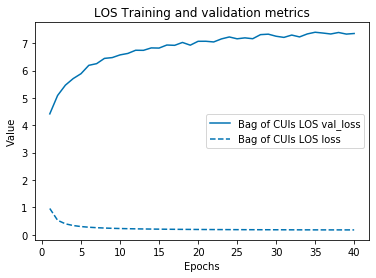

In [9]:
plot_multiple(['val_loss', 'loss'],histories)

In [43]:
plot_multiple(['matthews_correlation'],histories)

KeyError: 'matthews_correlation'

In [42]:
# auc_chart = getcsvmetrics(histpaths, names)
testdir = '../mimic3models/length_of_stay/test_predictions/'
testpaths = [testdir + x for x in os.listdir(testdir)]

testpaths

['../mimic3models/length_of_stay/test_predictions/LOS_structured_condensed_.csv',
 '../mimic3models/length_of_stay/test_predictions/LOS_structured_.csv']